# Clustering

## Pengertian K-Means Clustering

**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk membagi data ke dalam kelompok (cluster) berdasarkan kemiripan fitur. Algoritma ini bekerja dengan mengelompokkan data ke dalam **k** cluster yang berbeda, di mana setiap data point akan termasuk dalam cluster dengan centroid terdekat.

---

### Cara Kerja K-Means

$\textbf{1. Menentukan Jumlah Cluster (K):  } $
    Tentukan jumlah cluster yang diinginkan sesuai dengan kebutuhan analisis.  

$\textbf{2. Inisialisasi Centroid:  } $
    Pilih secara acak K titik awal sebagai centroid (pusat cluster).  

$\textbf{3. Mengelompokkan Data ke Centroid Terdekat:  } $
- Hitung jarak setiap data ke masing-masing centroid (biasanya menggunakan jarak Euclidean).  
- Kelompokkan data ke cluster dengan centroid terdekat.  

$\textbf{4. Memperbarui Centroid:  } $
    Hitung rata-rata posisi dari semua data dalam setiap cluster, lalu jadikan hasilnya sebagai centroid baru.  

$\textbf{5. Iterasi:  } $
    Ulangi langkah 3 dan 4 hingga salah satu kondisi berikut tercapai:  
- Centroid tidak mengalami perubahan signifikan.  
- Jumlah iterasi maksimum telah tercapai.  

---

### Keunggulan dan Kelemahan

**Keunggulan K-Means:**  
- Cepat dan efisien untuk data besar.  
- Mudah diimplementasikan.  
- Cocok untuk data numerik.  

**Kelemahan K-Means:**
- Harus menentukan K terlebih dahulu (bisa menggunakan Elbow Method atau Silhouette Analysis).  
- Sensitif terhadap centroid awal (solusi: K-Means++).  
- Tidak cocok untuk data kategorikal atau cluster yang tidak berbentuk bulat (non-globular).  

---

### Contoh Penerapan
- Segmentasi pelanggan berdasarkan perilaku belanja.  
- Pengelompokan dokumen berdasarkan topik.  
- Analisis citra (segmentasi warna).  


## Metode Evaluasi Klustering

Untuk mengevaluasi hasil klustering, beberapa metrik yang umum digunakan adalah:

### 1. Inertia (Sum of Squared Errors - SSE)
Inertia mengukur seberapa padat (compact) cluster dengan menghitung total jarak kuadrat antara setiap titik data dan centroid-nya.

$$
Inertia = \sum_{j=1}^k \sum_{\mathbf{x}_i \in C_j} \|\mathbf{x}_i - \boldsymbol{\mu}_j\|^2
$$

$\begin{array}{ll}
k & \text{: jumlah cluster} \\
C_j & \text{: cluster ke-}j \\
\boldsymbol{\mu}_j & \text{: centroid cluster } C_j \\
x_i & \text{: data point ke-i} \\
\|\mathbf{x}_i - \boldsymbol{\mu}_j\| & : \text{jarak Euclidean antara } \mathbf{x}_i \text{ dan } \boldsymbol{\mu}_j
\end{array}$

- Semakin kecil nilai Inertia, semakin baik karena data lebih dekat dengan centroid-nya.
- Kelemahan: Tidak bisa menentukan *k* optimal secara langsung (biasanya digunakan dengan Elbow Method).

### 2. Silhouette Coefficient
**Silhouette Score untuk satu data point**

Silhouette mengukur seberapa baik suatu data point ditempatkan dalam cluster-nya dengan membandingkan jarak intra-cluster $\mathbf({a}_i)$ dan jarak inter-cluster terdekat $\mathbf({b}_i)$.

$$

s(i) = \frac{b_i - a_i}{\max(a_i, b_i)}

$$

$\begin{array}{ll}
s(i) & \text{: nilai Silhouette untuk data point} \quad s(i) \quad \\
a_i & \text{: Jarak rata-rata} \quad x_i \quad \text{ke semua titik dalam cluster yang sama} \\
b_i & \text{: Jarak rata-rata} \quad x_i \quad \text{ke semua titik di cluster terdekat}
\end{array}$

<br>

**Rata-rata Silhouette Score**

$$
\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

$n \text{: Jumlah total data points}$


### 3. Elbow Method

**Plot Inertia vs $k$**

$$
\text{Inertia}(k) = \sum_{j=1}^{k} \sum_{x_i \in C_j} \|x_i - \mu_j\|^2
$$

- plot $Inertia(k)$ untuk berbagai nilai $k$ dan cari siku(elbow)





## Implementasi K-Means Menggunakan Dataset Iris

### Persiapan Data

In [5]:
%pip install pandas numpy matplotlib scikit-learn tabulate seaborn sqlalchemy pymysql -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


### Koneksi Database

In [6]:
user = "avnadmin"
password = "AVNS_51Gsoy5p7Uau3UQKO3Q"
host = "iris-data-mining1.j.aivencloud.com"
port = 18429
database = "defaultdb"

db_url = (f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
engine = create_engine(db_url)

# Contoh query: ganti dengan nama tabel kamu
query = "SELECT * FROM default_iris_mysql"

# Ambil data pakai pandas
data = pd.read_sql(query, engine)

# Tampilkan hasil
print(data)

      id           class  petal length  petal width  sepal length  sepal width
0      1     Iris-setosa           1.4          0.2           5.1          3.5
1      2     Iris-setosa           1.4          0.2           4.9          3.0
2      3     Iris-setosa           1.3          0.2           4.7          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           5.2          2.3           6.7          3.0
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0

[150 rows x 6 columns]


### Standarisasi data menggunakan library StandardScaler

In [7]:
# Hapus kolom id dan class
X = data.drop(['id', 'class'], axis=1,inplace=False)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah Standarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Data setelah Standarisasi:
   petal length  petal width  sepal length  sepal width
0     -1.341272    -1.312977     -0.900681     1.032057
1     -1.341272    -1.312977     -1.143017    -0.124958
2     -1.398138    -1.312977     -1.385353     0.337848
3     -1.284407    -1.312977     -1.506521     0.106445
4     -1.341272    -1.312977     -1.021849     1.263460


**Penjelasan:**

- Kita memuat dataset Iris dan menghapus kolom 'id' dan 'class' karena tidak diperlukan untuk klastering.

- Data kemudian distandardisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama.

### Menentukan Jumlah Klaster Optimal
Metode Elbow

In [8]:
# Inisialisasi list untuk menyimpan metrik
sse = []
silhouette_scores = []
iterations = []
k_values = range(2, 5)  # k=2,3,4

# Hitung SSE dan Silhouette untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    random_state=42,
                    n_init=10,
                    max_iter=500,
                    tol=1e-46)
    kmeans.fit(X_scaled)

    sse.append(kmeans.inertia_)  # SSE (Inertia)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    iterations.append(kmeans.n_iter_) 

# Tampilkan dalam tabel
metrics_table = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'SSE (Inertia)': sse,
    'Silhouette Score': silhouette_scores,
    'Iterations': iterations
})

print("\nPerbandingan Metrik Klastering:")
print(tabulate(metrics_table, headers='keys', tablefmt='grid', showindex=False))


Perbandingan Metrik Klastering:
+--------------------------+-----------------+--------------------+--------------+
|   Number of Clusters (k) |   SSE (Inertia) |   Silhouette Score |   Iterations |
+==========================+=================+====================+==============+
|                        2 |         223.732 |           0.580184 |            7 |
+--------------------------+-----------------+--------------------+--------------+
|                        3 |         140.966 |           0.458972 |            4 |
+--------------------------+-----------------+--------------------+--------------+
|                        4 |         114.618 |           0.385285 |            4 |
+--------------------------+-----------------+--------------------+--------------+


**Penjelasan:**

- SSE (Sum of Squared Errors) menurun saat k meningkat (**k=2** memiliki SSE tertinggi, **k=4** terendah).

- Silhouette Score tertinggi pada **k=2** (0.52), menurun saat k bertambah.

- **k=3** mungkin optimal karena SSE turun signifikan dibanding **k=2**, tetapi Silhouette masih baik (~0.46).

Iterasi K-Means diamati untuk melihat efisiensi konvergensi algoritma. Nilai iterasi yang rendah menunjukkan bahwa K-Means cepat stabil, sementara nilai tinggi mengindikasikan struktur data yang lebih kompleks atau centroid awal yang kurang baik. Perbandingan antar k juga menunjukkan bagaimana kompleksitas klaster memengaruhi waktu konvergensi.

### Visualisasi Metode Elbow

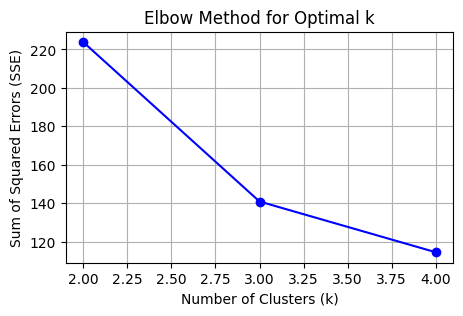

In [9]:
plt.figure(figsize=(5, 3))
plt.plot(k_values, sse, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

- "Elbow" (titik siku) terlihat di **k=3**, di mana penurunan SSE mulai melambat.

- **k=3** adalah kandidat terbaik untuk jumlah klaster.

### Visualisasi Klastering

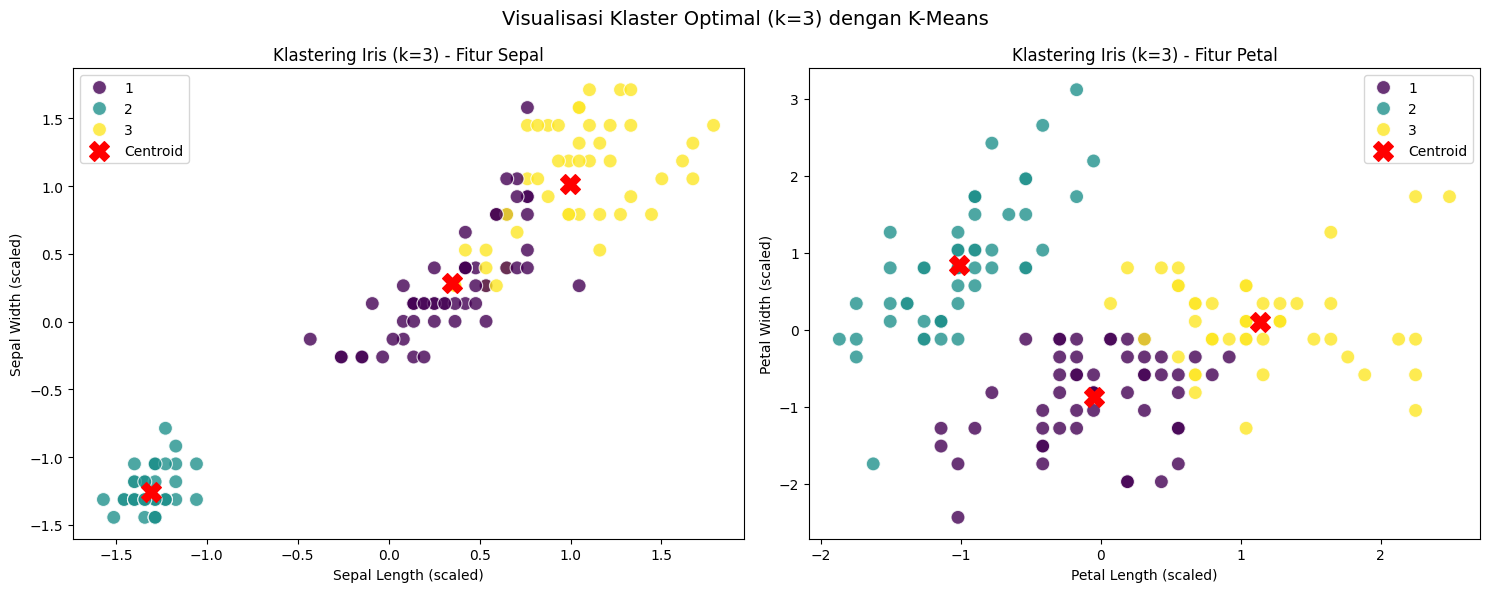

In [10]:
import seaborn as sns

# 1. Klastering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_ + 1

# 2. Visualisasi 2 Pasang Fitur (Sepal vs Petal)
plt.figure(figsize=(15, 6))

# --- Plot 1: Sepal Length vs Sepal Width ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Sepal")
plt.legend()

# --- Plot 2: Petal Length vs Petal Width ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_scaled[:, 2], y=X_scaled[:, 3],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Petal")
plt.legend()

plt.suptitle("Visualisasi Klaster Optimal (k=3) dengan K-Means", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
# Menambahkan kolom cluster ke dataframe original
data['cluster'] = kmeans.labels_ + 1 

# Menghitung jumlah data per cluster
cluster_counts = data['cluster'].value_counts().sort_index()
print("\nJumlah data per cluster:")
print(cluster_counts)


Jumlah data per cluster:
cluster
1    53
2    50
3    47
Name: count, dtype: int64


### Menyimpan Hasil(CSV)

In [12]:
# Menyimpan data dengan kolom cluster ke file baru
data.to_csv('./property/iris_with_clusters.csv', index=False)
print("\nData dengan cluster telah disimpan ke iris_with_clusters.csv")


Data dengan cluster telah disimpan ke iris_with_clusters.csv


### Presentasae Ketidaksesuaian 

In [13]:
# Membaca data dari file CSV
cluster = pd.read_csv('./property/iris_with_clusters.csv')

# Membuat mapping untuk label class ke numerik
class_mapping = {
    'Iris-versicolor': 1,
    'Iris-setosa': 2,
    'Iris-virginica': 3
}

# Menambahkan kolom numeric_class berdasarkan mapping
cluster['numeric_class'] = cluster['class'].map(class_mapping)

# Menghitung ketidaksesuaian (1 jika tidak sesuai, 0 jika sesuai)
cluster['mismatch'] = (cluster['numeric_class'] != cluster['cluster']).astype(int)

# Menghitung total dan persentase ketidaksesuaian
total_mismatches = cluster['mismatch'].sum()
total_samples = len(cluster)
mismatch_percentage = (total_mismatches / total_samples) * 100

# Menampilkan hasil
print(f"Total ketidaksesuaian: {total_mismatches} dari {total_samples} sampel")
print(f"Persentase ketidaksesuaian: {mismatch_percentage:.2f}%")

# Menampilkan detail ketidaksesuaian per class
print("\nDetail ketidaksesuaian per class:")
mismatch_detail = cluster.groupby('class')['mismatch'].agg(['sum', 'count'])
mismatch_detail['percentage'] = (
    mismatch_detail['sum'] / mismatch_detail['count']) * 100
print(mismatch_detail)

Total ketidaksesuaian: 25 dari 150 sampel
Persentase ketidaksesuaian: 16.67%

Detail ketidaksesuaian per class:
                 sum  count  percentage
class                                  
Iris-setosa        0     50         0.0
Iris-versicolor   11     50        22.0
Iris-virginica    14     50        28.0


## Pengertian Fuzzy C-Means Clustering(FCM)

**Fuzzy C-Means (FCM)** adalah metode clustering atau pengelompokan data yang berbasis pada logika fuzzy. Berbeda dengan metode klusterisasi klasik seperti **K-Means**, di mana satu data hanya bisa menjadi anggota satu kluster saja, dalam FCM, sebuah data dapat menjadi anggota dari **lebih dari satu kluster** dengan **derajat keanggotaan tertentu**.

Tujuan utama FCM: Mencari pusat kluster sedemikian rupa sehingga setiap data memiliki derajat keanggotaan terhadap tiap kluster.


### Konsep Dasar Fuzzy C-Means

1. **Fuzzy Logic:**

    - Dalam logika fuzzy, suatu elemen dapat menjadi anggota dari beberapa himpunan (cluster) dengan derajat keanggotaan tertentu.
    - Misalnya, titik data $x_i$ dapat memiliki derajat keanggotaan $u_{ij}$ terhadap cluster ke-$j$.\

2. **Objective Function (Fungsi Tujuan):**
   
    FCM meminimalkan fungsi objektif berikut:

    $$
    J = \sum_{i=1}^{n} \sum_{j=1}^{c} u_{ij}^m \cdot \| x_i - v_j \|^2
    $$
    Dimana:

    - $J$ = adalah fungsi objektif, biasanya digunakan dalam algoritma Fuzzy C-Means.
    - $u_{ij}$ = adalah derajat keanggotaan data ke-$i$ terhadap cluster ke-$j$.
    - $m$ = adalah parameter pembobot fuzzy (biasanya $m > 1$).
    - $x_i$ = adalah vektor data ke-$i$.
    - $v_j$ = adalah pusat cluster ke-$j$.
    - $|x_i - v_j|^2$ = adalah jarak Euclidean kuadrat antara $x_i$ dan $v_j$.

3. **Proses Iteratif:**
   
    FCM bekerja secara iteratif dengan memperbarui:
    - **Derajat Keanggotaan**($u_{ij}$):
    
    $$
    u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m - 1}}}
    $$

    - **Pusat Cluster**($v_j$):
    $$
    v_j = \frac{\sum_{i=1}^{n} u_{ij}^m \cdot x_i}{\sum_{i=1}^{n} u_{ij}^m}
    $$

---

### Langkah-Langkah Algoritma FCM

1. Inisialisasi:
   - Tentukan jumlah cluster ($c$).
   - Tentukan nilai fuzzifier ($m$), biasanya $m=2$.
   - Inisialisasi matriks keanggotaan $U$ secara acak.
2. Hitung Pusat Cluster ($v_j$):
   
   Gunakan rumus di atas untuk menghitung pusat *cluster* berdasarkan derajat keanggotaan saat ini.
3. Perbarui Derajat Keanggotaan ($u_{ij}$):

    Hitung ulang derajat keanggotaan berdasarkan jarak data ke pusat cluster.
4. Cek Kriteria Berhenti:
   
    - Jika perubahan matriks keanggotaan atau fungsi objektif ($J$) sudah sangat kecil (di bawah threshold), maka berhenti.
    - Jika belum, kembali ke langkah 2.

---

### Keunggulan dan Kelemahan

**Keunggulan FCM**
- Fleksibel: Data bisa masuk ke beberapa cluster sekaligus.
- Cocok untuk Data yang Tumpang Tindih: Berguna ketika batas antar-cluster tidak jelas.
- Lebih Stabil daripada K-Means: Karena menggunakan pendekatan probabilitas.

**Kelemahan FCM**
- Sensitif terhadap Inisialisasi Awal: Hasil bisa berbeda tergantung nilai awal.
- Komputasi Lebih Lambat: Karena proses iteratif yang kompleks.
- Harus Tentukan Jumlah Cluster ($c$): Tidak bisa menentukan $c$ secara otomatis.

## Implementasi Fuzzy C-Means Menggunakan Dataset Iris

### Persiapan Data

In [14]:
%pip install scikit-fuzzy scikit-learn -q
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### Preview Data

In [16]:
df = data
df.head()

,id,class,petal length,petal width,sepal length,sepal width,cluster
0,1,Iris-setosa,1.4,0.2,5.1,3.5,2
1,2,Iris-setosa,1.4,0.2,4.9,3.0,2
2,3,Iris-setosa,1.3,0.2,4.7,3.2,2
3,4,Iris-setosa,1.5,0.2,4.6,3.1,2
4,5,Iris-setosa,1.4,0.2,5.0,3.6,2


### Standarisasi Data Z-Score

In [17]:
X = df.iloc[:, 2:6].values
col = df.columns[2:6]
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data = pd.DataFrame(X_scaled, columns=col)
data.head()

,petal length,petal width,sepal length,sepal width
0,-1.341272,-1.312977,-0.900681,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
2,-1.398138,-1.312977,-1.385353,0.337848
3,-1.284407,-1.312977,-1.506521,0.106445
4,-1.341272,-1.312977,-1.021849,1.263460


### Menentukan Jumlah Cluster Optimal

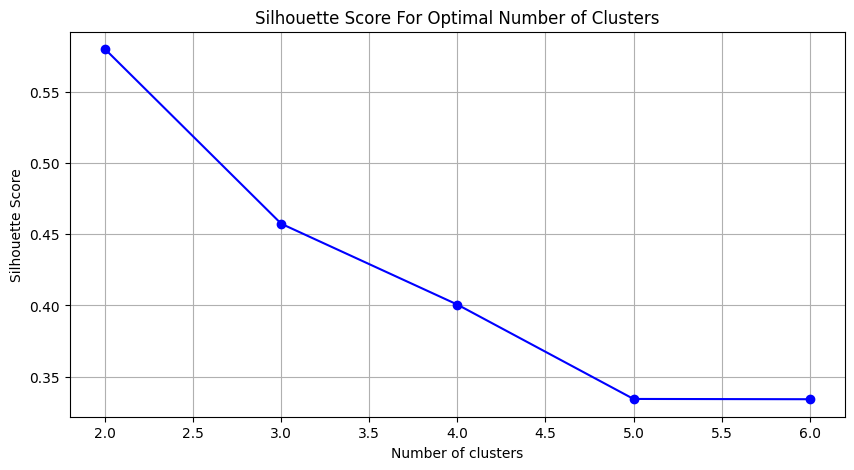

In [20]:
# Range jumlah cluster yang akan diuji
cluster_range = range(2, 7)

# Inisialisasi list untuk menyimpan hasil
inertia_values = []
silhouette_scores = []

# Uji berbagai jumlah cluster
for n_clusters in cluster_range:
    # Fuzzy C-Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

    # Hitung inersia (fuzzy partition coefficient)
    inertia = np.sum(jm)
    inertia_values.append(inertia)

    # Hitung silhouette score
    cluster_membership = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_scaled, cluster_membership)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.grid(True)
plt.show()

### Melakukan Fuzzy C-Means dengan Jumlah Cluster Optimal

In [22]:
# Pilih jumlah cluster optimal
optimal_clusters = 3

# Lakukan Fuzzy C-Means dengan cluster optimal
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, optimal_clusters, 2, error=0.005, maxiter=1000)

# Prediksi cluster untuk setiap data point
cluster_membership = np.argmax(u, axis=0)

# Buat DataFrame untuk visualisasi
vis_df = pd.DataFrame(X_scaled, columns=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'])
vis_df['cluster'] = cluster_membership

### Visualisasi Sepal (Sepal Length vs Sepal Width)

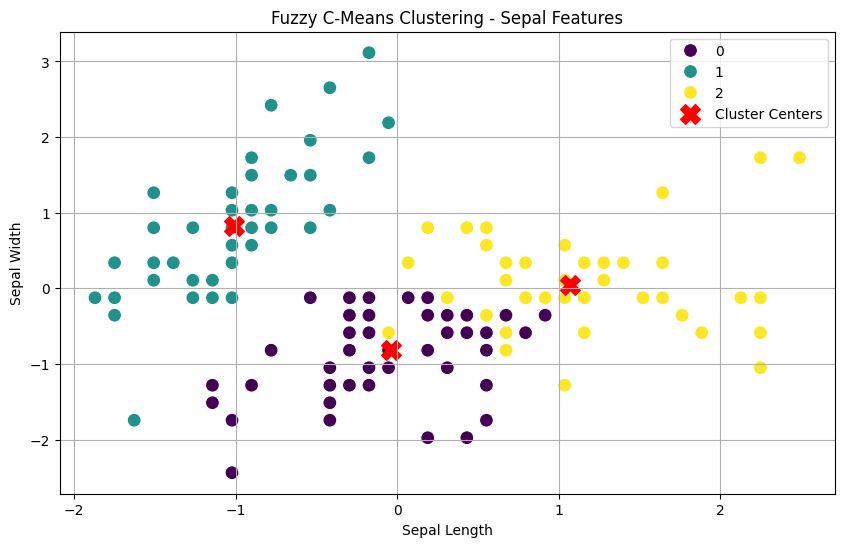

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vis_df, x='sepal_length', y='sepal_width',
                hue='cluster', palette='viridis', s=100)
plt.scatter(cntr[:, 2], cntr[:, 3], marker='X', s=200,
            color='red', label='Cluster Centers')
plt.title('Fuzzy C-Means Clustering - Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

### Visualisasi Petal (Petal Length vs Petal Width)

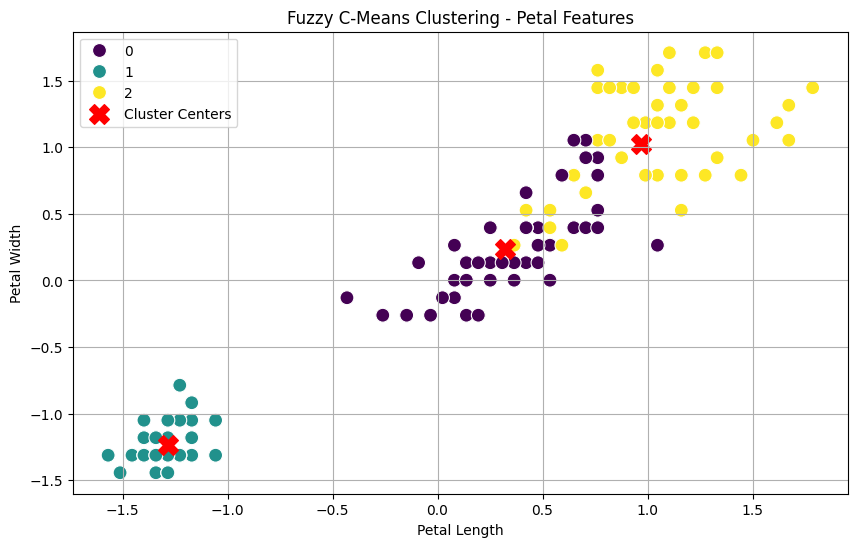

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vis_df, x='petal_length', y='petal_width',
                hue='cluster', palette='viridis', s=100)
plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', s=200,
            color='red', label='Cluster Centers')
plt.title('Fuzzy C-Means Clustering - Petal Features')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)
plt.show()